<a href="https://colab.research.google.com/github/shaimaaaaaaaaaa/thesis/blob/main/full_solver_analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Full SAT Solver Result Analysis

## 📂 Upload and Analyze Actual Solver Results

In [1]:
# Upload the actual solver CSV files
from google.colab import files
uploaded = files.upload()  # Upload: cadical_results.csv, kissat_results.csv, glucose_results.csv, maplesat_results.csv


Saving glucose_results.csv to glucose_results.csv
Saving maplesat_results.csv to maplesat_results.csv
Saving kissat_results.csv to kissat_results.csv
Saving cadical_results.csv to cadical_results.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSVs into dataframes
df_cadical = pd.read_csv("cadical_results.csv")
df_kissat = pd.read_csv("kissat_results.csv")
df_glucose = pd.read_csv("glucose_results.csv")
df_maplesat = pd.read_csv("maplesat_results.csv")

# Mark solved based on outcome
for df in [df_cadical, df_kissat, df_glucose, df_maplesat]:
    df['solved'] = df['outcome'].str.contains("SAT", case=False) & (df['time'] < 10000)


In [7]:
# 📊 Solve Rate Summary for All Solvers

summary = pd.DataFrame({
    "Solver": ["CaDiCaL", "Kissat", "Glucose", "MapleSAT"],
    "Solved": [
        df_cadical['solved'].sum(),
        df_kissat['solved'].sum(),
        df_glucose['solved'].sum(),
        df_maplesat['solved'].sum()
    ],
    "Total": [
        len(df_cadical),
        len(df_kissat),
        len(df_glucose),
        len(df_maplesat)
    ]
})
summary["Solve Rate"] = (summary["Solved"] / summary["Total"]).round(3)
display(summary)


,Solver,Solved,Total,Solve Rate
0,CaDiCaL,15,49,0.306
1,Kissat,18,49,0.367
2,Glucose,15,49,0.306
3,MapleSAT,15,49,0.306


## 📊 Bar Plots: Solved vs. Unsolved Counts

<ipython-input-9-c3e27c25d3d5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=solved_df, x="Solver", y="Solved", palette="viridis")


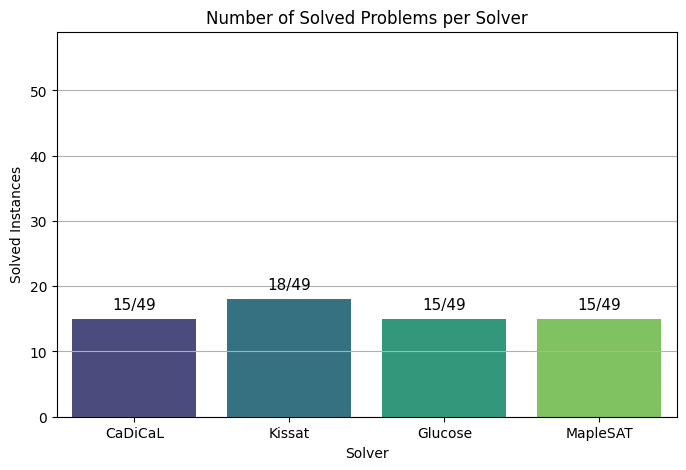

In [9]:
# 📊 Bar Plot: Number of Solved Problems per Solver (with total count labels)

# Prepare data
solved_data = {
    "Solver": ["CaDiCaL", "Kissat", "Glucose", "MapleSAT"],
    "Solved": [
        df_cadical['solved'].sum(),
        df_kissat['solved'].sum(),
        df_glucose['solved'].sum(),
        df_maplesat['solved'].sum()
    ],
    "Total": [
        len(df_cadical),
        len(df_kissat),
        len(df_glucose),
        len(df_maplesat)
    ]
}
solved_df = pd.DataFrame(solved_data)
solved_df["Label"] = solved_df["Solved"].astype(str) + "/" + solved_df["Total"].astype(str)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=solved_df, x="Solver", y="Solved", palette="viridis")

# Annotate bars
for i, row in solved_df.iterrows():
    ax.text(i, row["Solved"] + 1, row["Label"], ha='center', va='bottom', fontsize=11)

plt.title("Number of Solved Problems per Solver")
plt.ylabel("Solved Instances")
plt.ylim(0, solved_df["Total"].max() + 10)
plt.grid(axis='y')
plt.show()


## 📈 Lots of Plots

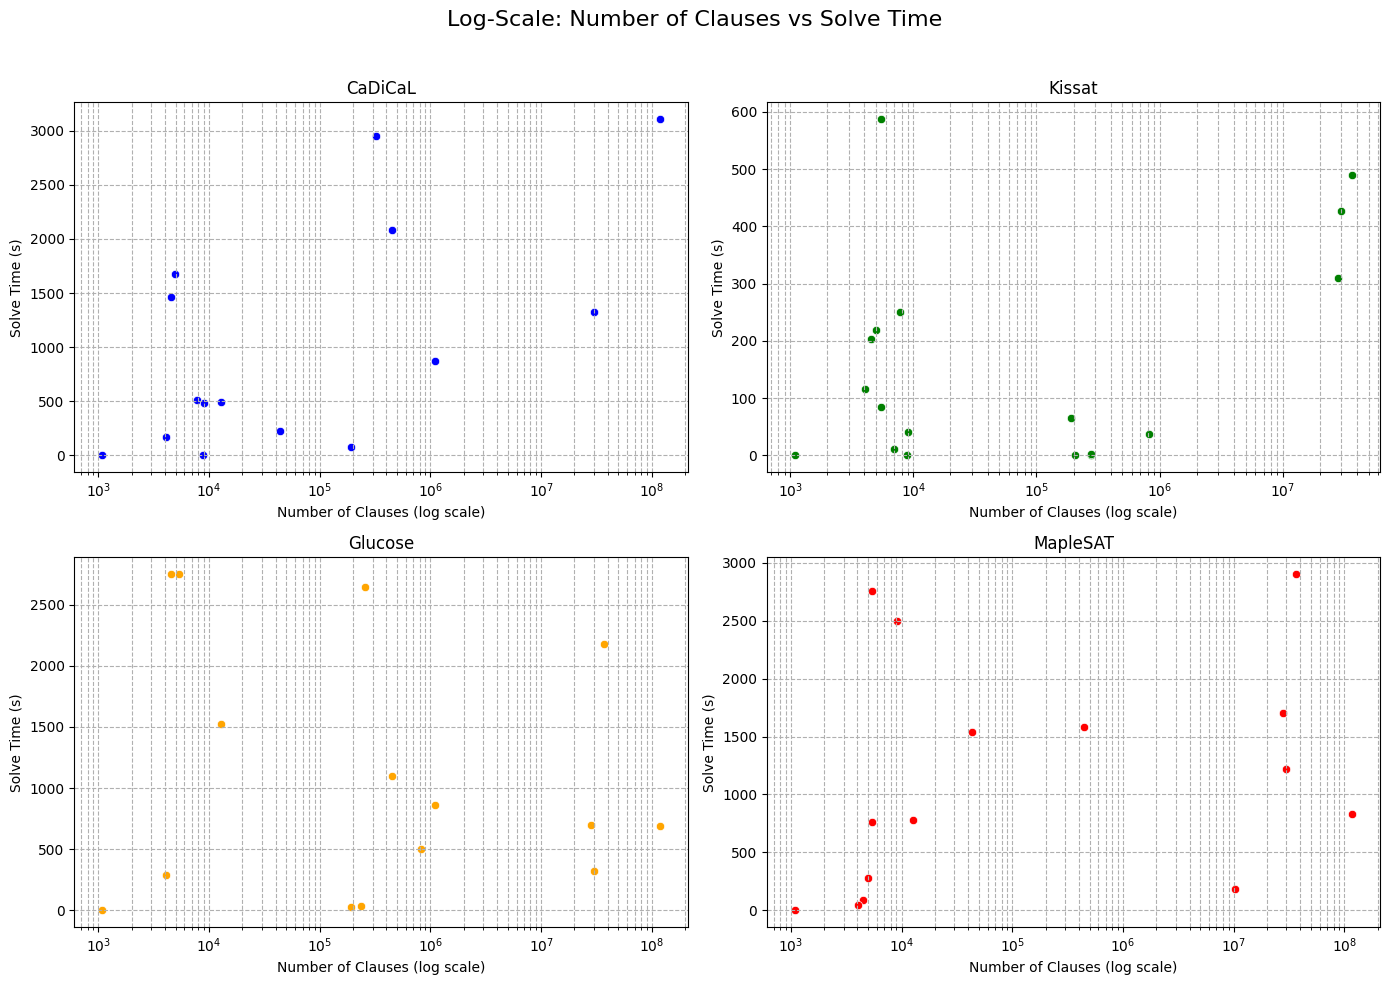

In [14]:
# 📈 Log-Scaled Scatter Plots: num_clauses vs Solve Time for All Solvers

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Log-Scale: Number of Clauses vs Solve Time", fontsize=16)

# Helper function to plot each solver
def log_scatter(ax, df, solver_name, color):
    sns.scatterplot(ax=ax, x='clauses', y='time', data=df[df['solved']], color=color)
    ax.set_xscale('log')
    ax.set_title(solver_name)
    ax.set_xlabel("Number of Clauses (log scale)")
    ax.set_ylabel("Solve Time (s)")
    ax.grid(True, which="both", linestyle="--")

log_scatter(axes[0, 0], df_cadical, "CaDiCaL", "blue")
log_scatter(axes[0, 1], df_kissat, "Kissat", "green")
log_scatter(axes[1, 0], df_glucose, "Glucose", "orange")
log_scatter(axes[1, 1], df_maplesat, "MapleSAT", "red")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [15]:
# 📌 Compute clause-to-var ratio for each solver
for df in [df_cadical, df_kissat, df_glucose, df_maplesat]:
    df['clause_var_ratio'] = df['clauses'] / df['vars']


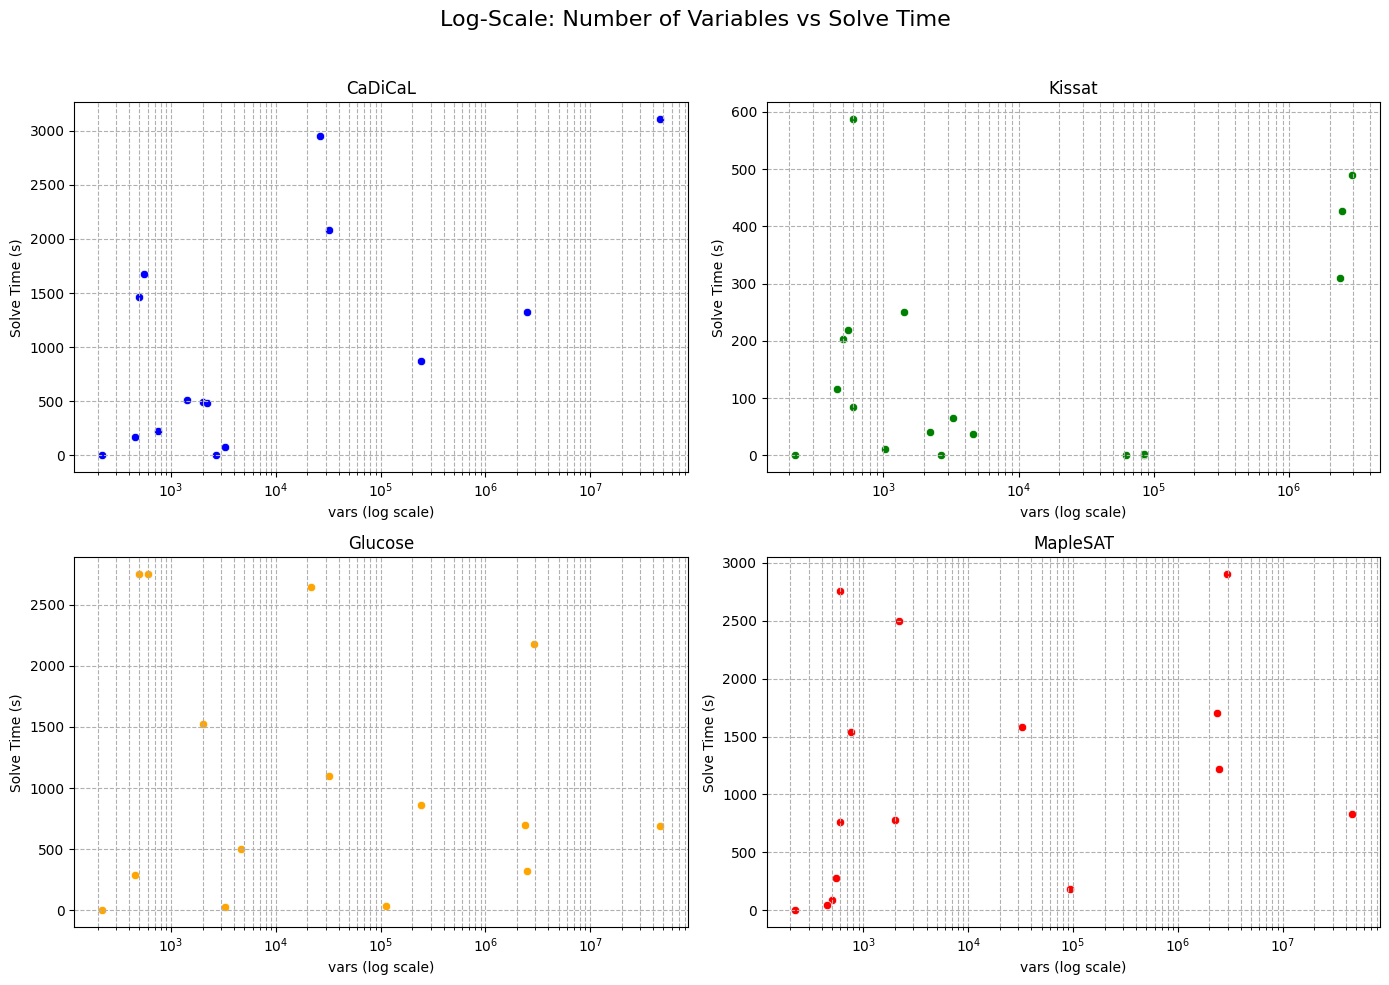

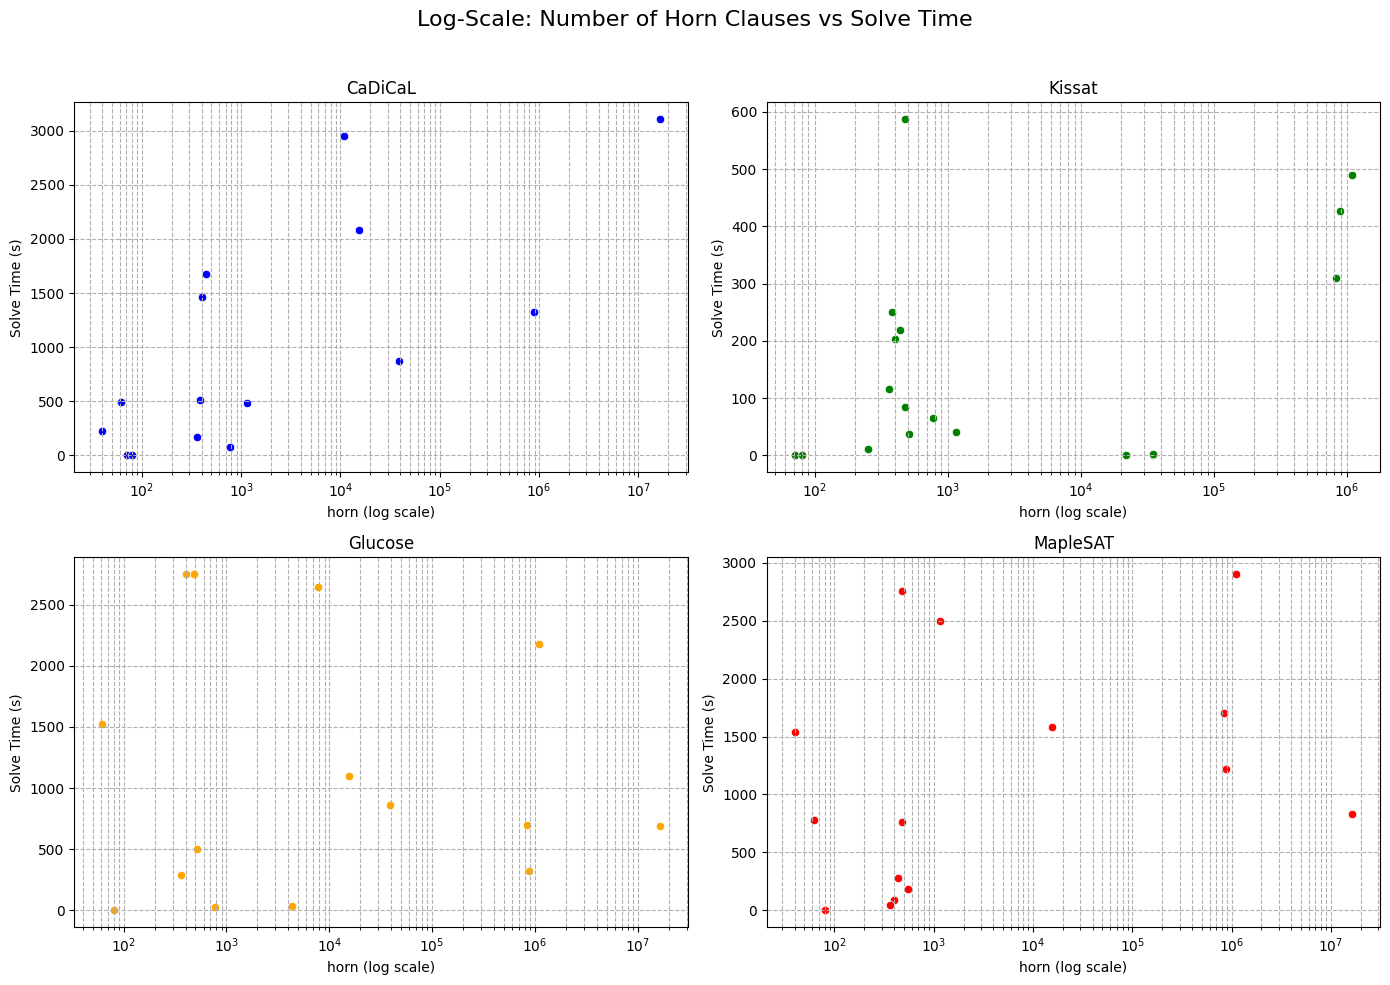

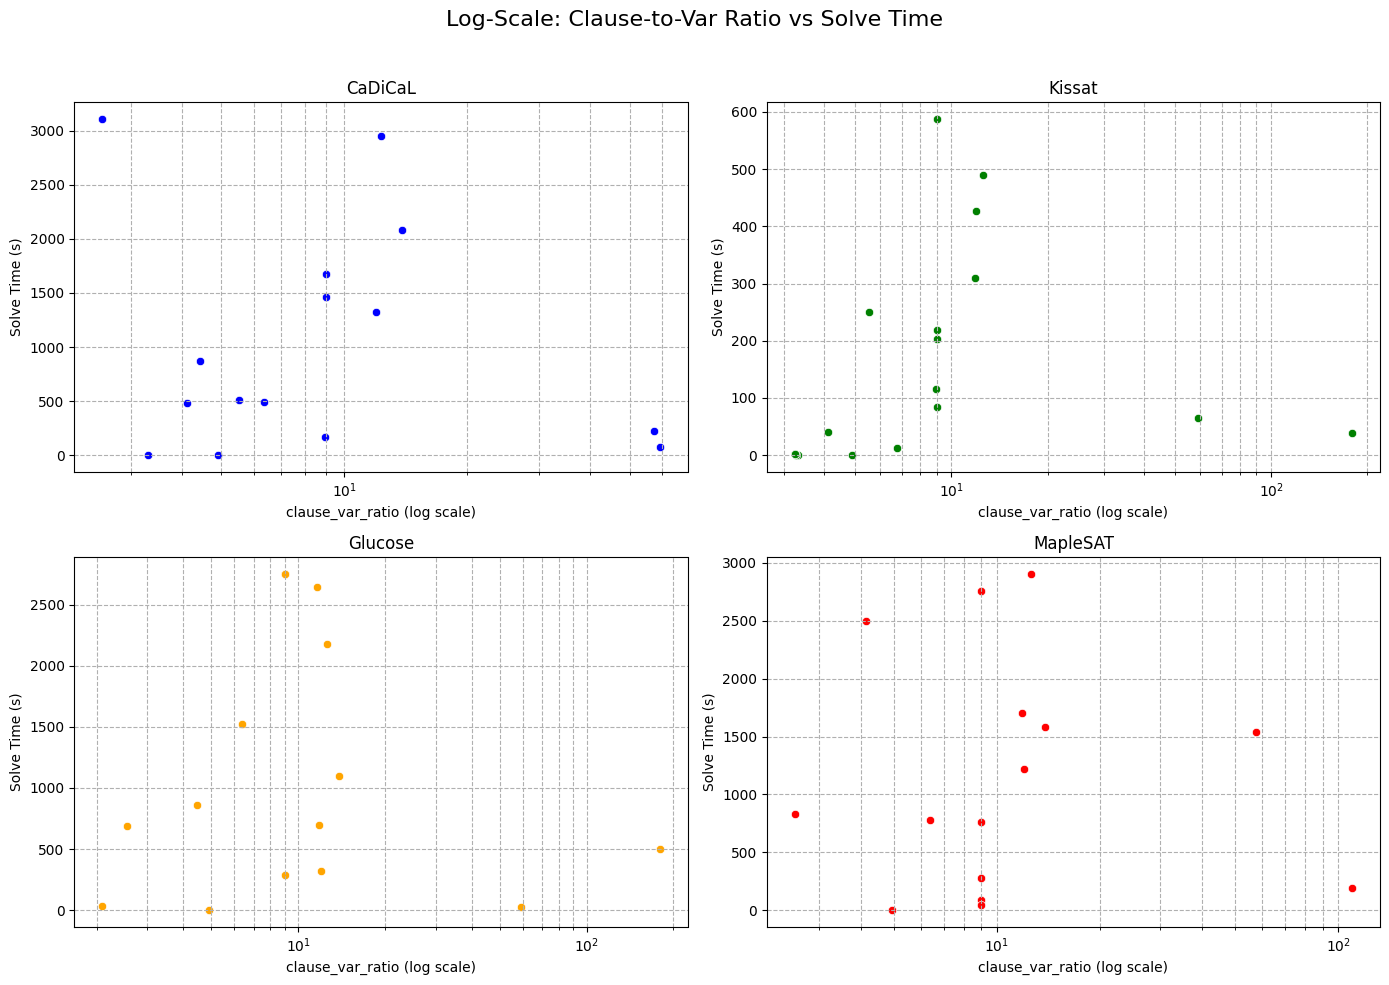

In [30]:
# 📈 Grid of Log-Scaled Scatter Plots: Feature vs Solve Time for All Solvers

def log_grid_scatter(feature, title_label=None):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Log-Scale: {title_label or feature} vs Solve Time", fontsize=16)

    def plot(ax, df, solver_name, color):
        df_plot = df[df['solved'] & df[feature].notna()]
        sns.scatterplot(ax=ax, x=feature, y='time', data=df_plot, color=color)
        ax.set_xscale('log')
        ax.set_title(solver_name)
        ax.set_xlabel(f"{feature} (log scale)")
        ax.set_ylabel("Solve Time (s)")
        ax.grid(True, which="both", linestyle="--")

    plot(axes[0, 0], df_cadical, "CaDiCaL", "blue")
    plot(axes[0, 1], df_kissat, "Kissat", "green")
    plot(axes[1, 0], df_glucose, "Glucose", "orange")
    plot(axes[1, 1], df_maplesat, "MapleSAT", "red")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ▶ Run it for different features:
log_grid_scatter("vars", "Number of Variables")
log_grid_scatter("horn", "Number of Horn Clauses")
log_grid_scatter("clause_var_ratio", "Clause-to-Var Ratio")


In [34]:
# 📊 Pearson & Spearman Correlations Between Features and Solve Time (per Solver)
# - Only solved instances are considered
# - Bold cell = strongest (absolute) correlation for that solver

from scipy.stats import pearsonr, spearmanr
import numpy as np
import pandas as pd

# Feature columns to compare
feature_cols = ['vars', 'clauses', 'horn', 'large', 'clause_var_ratio']
solvers = {
    "CaDiCaL": df_cadical,
    "Kissat": df_kissat,
    "Glucose": df_glucose,
    "MapleSAT": df_maplesat
}

# Function to compute correlations
def compute_correlation_matrix(corr_func):
    rows = []
    for solver_name, df in solvers.items():
        df_filtered = df[df['solved']].copy()
        row = {"Solver": solver_name}
        for feature in feature_cols:
            if feature in df_filtered.columns and df_filtered[feature].nunique() > 1:
                try:
                    corr, _ = corr_func(df_filtered[feature], df_filtered['time'])
                    row[feature] = round(corr, 3)
                except:
                    row[feature] = np.nan
            else:
                row[feature] = np.nan
        rows.append(row)
    return pd.DataFrame(rows).set_index("Solver")

# Compute both Pearson and Spearman correlation tables
pearson_df = compute_correlation_matrix(pearsonr)
spearman_df = compute_correlation_matrix(spearmanr)

# Display Pearson table
print("📘 Pearson Correlation (linear relationships)")
def highlight_max_abs(s):
    max_val = s.abs().max()
    return ['font-weight: bold; background-color: #d4f0ff' if abs(v) == max_val else '' for v in s]
display(pearson_df.style.apply(highlight_max_abs, axis=1))

# Display Spearman table
print("📗 Spearman Correlation (rank-based, monotonic relationships)")
display(spearman_df.style.apply(highlight_max_abs, axis=1))


📘 Pearson Correlation (linear relationships)


,vars,clauses,horn,large,clause_var_ratio
Solver,,,,,
CaDiCaL,0.559000,0.568000,0.560000,0.048000,-0.269000
Kissat,0.621000,0.628000,0.623000,0.621000,-0.135000
Glucose,-0.108000,-0.093000,-0.106000,-0.003000,-0.207000
MapleSAT,-0.049000,0.082000,-0.046000,0.448000,-0.167000


📗 Spearman Correlation (rank-based, monotonic relationships)


,vars,clauses,horn,large,clause_var_ratio
Solver,,,,,
CaDiCaL,0.500000,0.525000,0.675000,0.297000,0.096000
Kissat,0.098000,0.123000,0.342000,0.606000,0.614000
Glucose,0.057000,0.089000,0.068000,-0.007000,0.104000
MapleSAT,0.615000,0.579000,0.529000,0.290000,0.225000


Pearson detects linear influence (e.g. double the clauses → ~double the time)

Spearman detects consistent rankings (e.g. more clauses → always slower, but not necessarily linearly)

High positive values (near +1) = strong increasing trend

High negative values (near -1) = strong decreasing trend

<ipython-input-36-69c3c8ca817b>:12: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


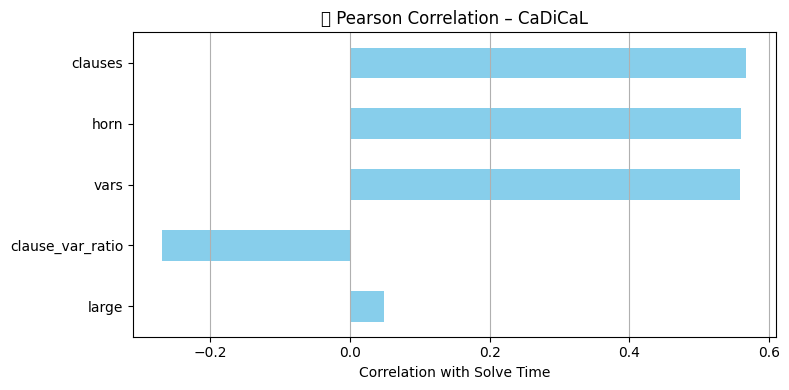

<ipython-input-36-69c3c8ca817b>:12: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


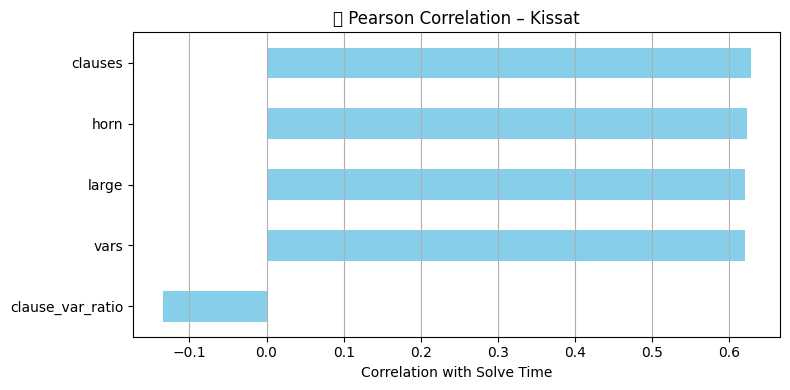

<ipython-input-36-69c3c8ca817b>:12: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


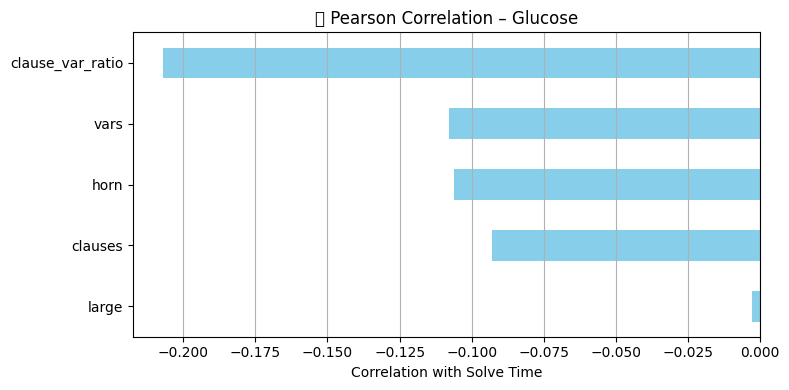

<ipython-input-36-69c3c8ca817b>:12: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


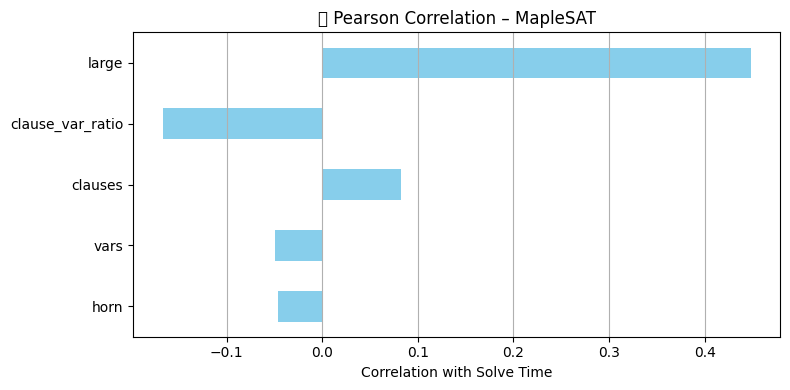

<ipython-input-36-69c3c8ca817b>:22: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


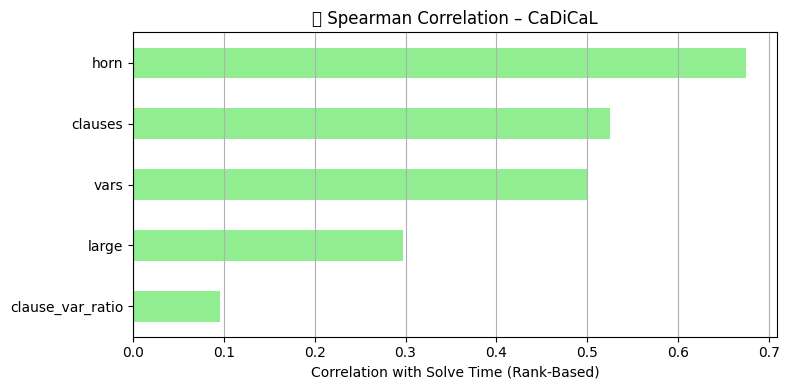

<ipython-input-36-69c3c8ca817b>:22: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


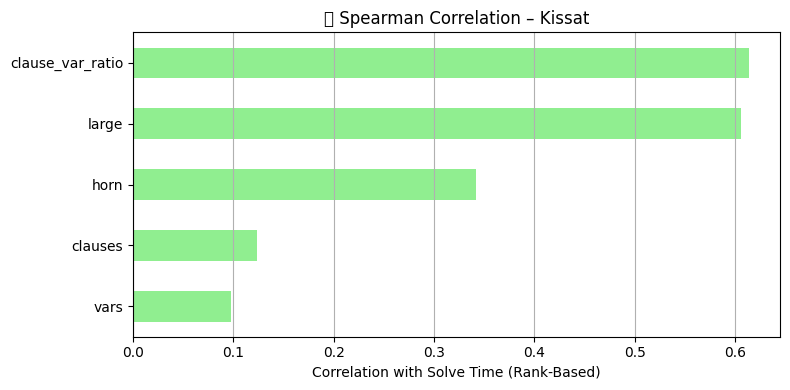

<ipython-input-36-69c3c8ca817b>:22: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


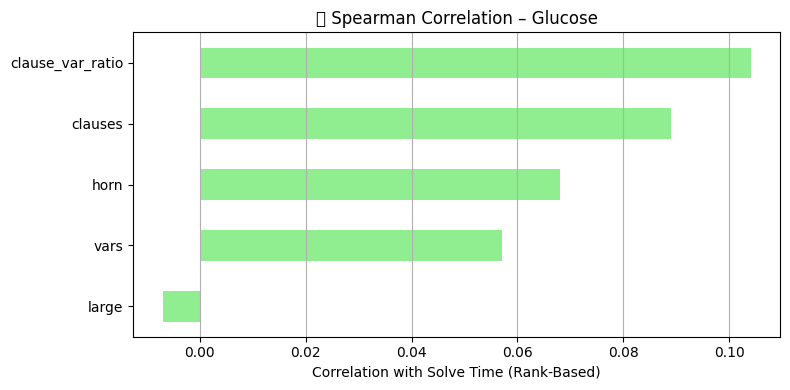

<ipython-input-36-69c3c8ca817b>:22: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


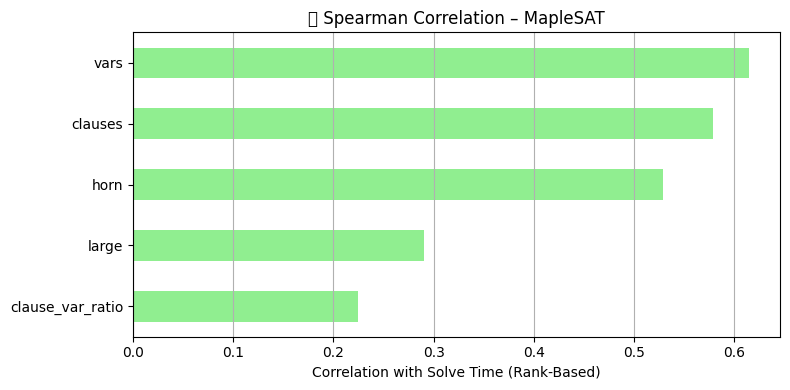

In [36]:
# 📊 Heatmaps and Bar Plots for Pearson and Spearman Correlations

import matplotlib.pyplot as plt

# --- Bar Plots per Solver (Pearson) ---
for solver in pearson_df.index:
    plt.figure(figsize=(8, 4))
    pearson_df.loc[solver].sort_values(key=abs).plot.barh(color='skyblue')
    plt.title(f"📘 Pearson Correlation – {solver}")
    plt.xlabel("Correlation with Solve Time")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# --- Bar Plots per Solver (Spearman) ---
for solver in spearman_df.index:
    plt.figure(figsize=(8, 4))
    spearman_df.loc[solver].sort_values(key=abs).plot.barh(color='lightgreen')
    plt.title(f"📗 Spearman Correlation – {solver}")
    plt.xlabel("Correlation with Solve Time (Rank-Based)")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()


## 📈 PPP: CaDiCaL vs Kissat

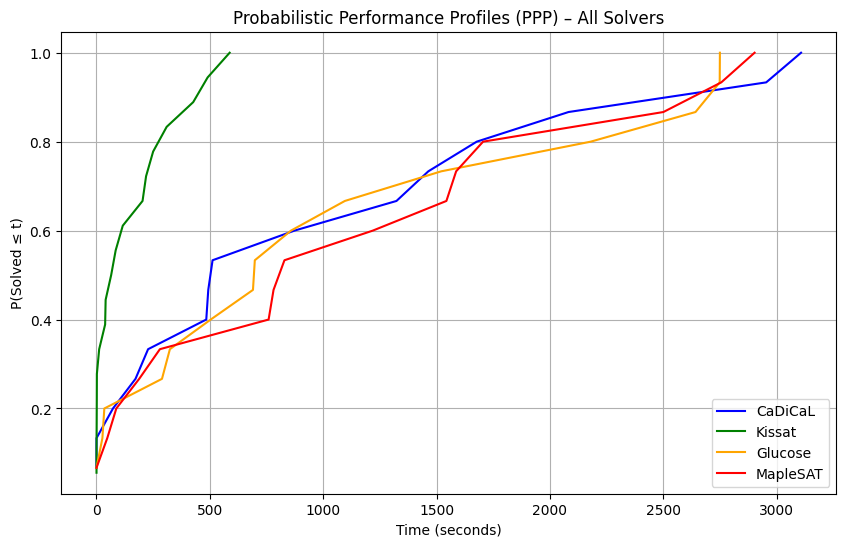

In [6]:
# 📈 PPP: CaDiCaL vs Kissat vs Glucose vs MapleSAT

# Helper function to compute PPP from solved times
def compute_ppp(df):
    times = df[df['solved']]['time']
    sorted_times = np.sort(times)
    yvals = np.arange(1, len(sorted_times) + 1) / len(sorted_times)
    return sorted_times, yvals

# Compute PPPs for each solver
cadical_x, cadical_y = compute_ppp(df_cadical)
kissat_x, kissat_y = compute_ppp(df_kissat)
glucose_x, glucose_y = compute_ppp(df_glucose)
maplesat_x, maplesat_y = compute_ppp(df_maplesat)

# Plot all together
plt.figure(figsize=(10, 6))
plt.plot(cadical_x, cadical_y, label="CaDiCaL", color='blue')
plt.plot(kissat_x, kissat_y, label="Kissat", color='green')
plt.plot(glucose_x, glucose_y, label="Glucose", color='orange')
plt.plot(maplesat_x, maplesat_y, label="MapleSAT", color='red')
plt.xlabel("Time (seconds)")
plt.ylabel("P(Solved ≤ t)")
plt.title("Probabilistic Performance Profiles (PPP) – All Solvers")
plt.legend()
plt.grid(True)
plt.show()
